#                                               ****SOCIAL MEDIA SENTIMENT ANALYSIS****

# **Importing Needed Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline



# **Data Load - Check Null values**

In [2]:
df=pd.read_csv(r'C:\Users\harin\Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# DATA VISUALIZATION



# **Total Number Tweets + Percentage**

Total number of sentiments of tweets :
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


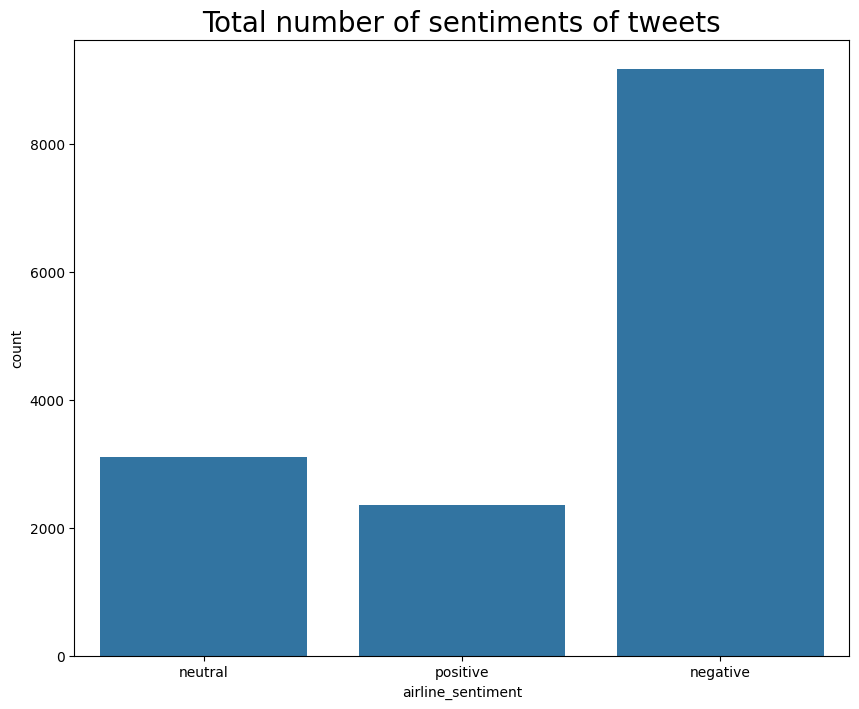

In [6]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df)
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()

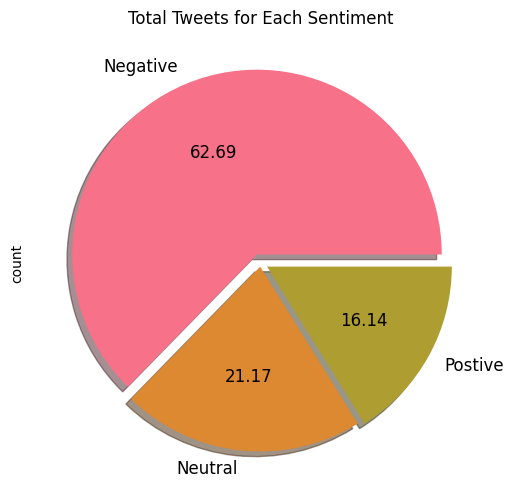

In [7]:
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(df['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()

# **Total Tweets**

Text(0, 0.5, 'No.of Tweets')

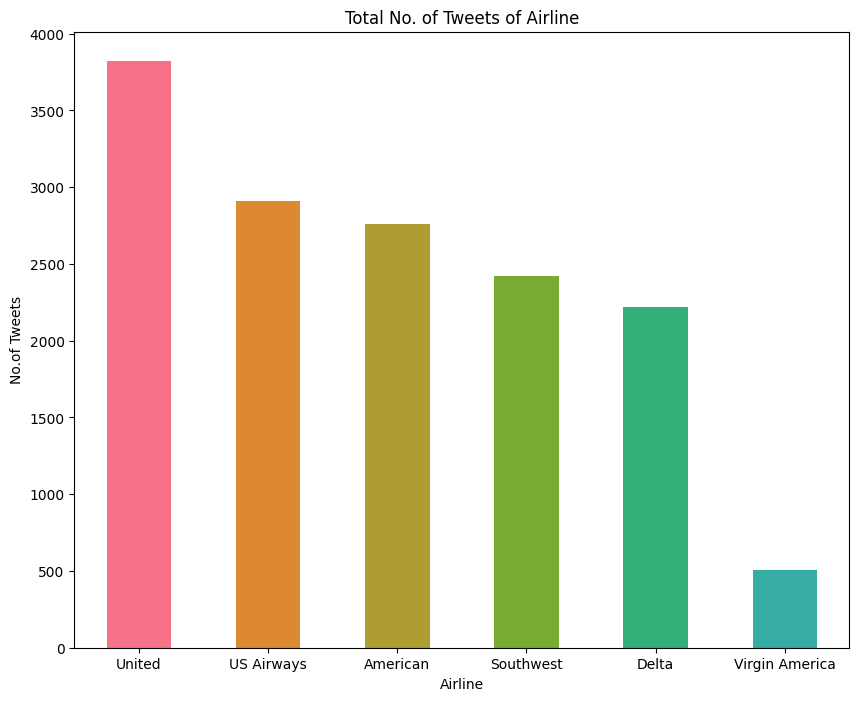

In [8]:
colors=sns.color_palette('husl',10)
pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,figsize=(10,8),fontsize=10,rot=0,title='Total No. of Tweets of Airline')
plt.xlabel('Airline',fontsize=10)
plt.ylabel('No.of Tweets',fontsize=10)

In [9]:
negative_sentiment_counts = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()

cprint("Total number of NEGATIVE tweets for each airline :",'green')
print(negative_sentiment_counts)

cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())



Total number of NEGATIVE tweets for each airline :
airline
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: count, dtype: int64
Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


# **Total NEGATIVE Tweets**

Total number of negative sentiment tweets for each airline:
airline
American          1960
Delta              955
Southwest         1186
US Airways        2263
United            2633
Virgin America     181
Name: airline_sentiment, dtype: int64


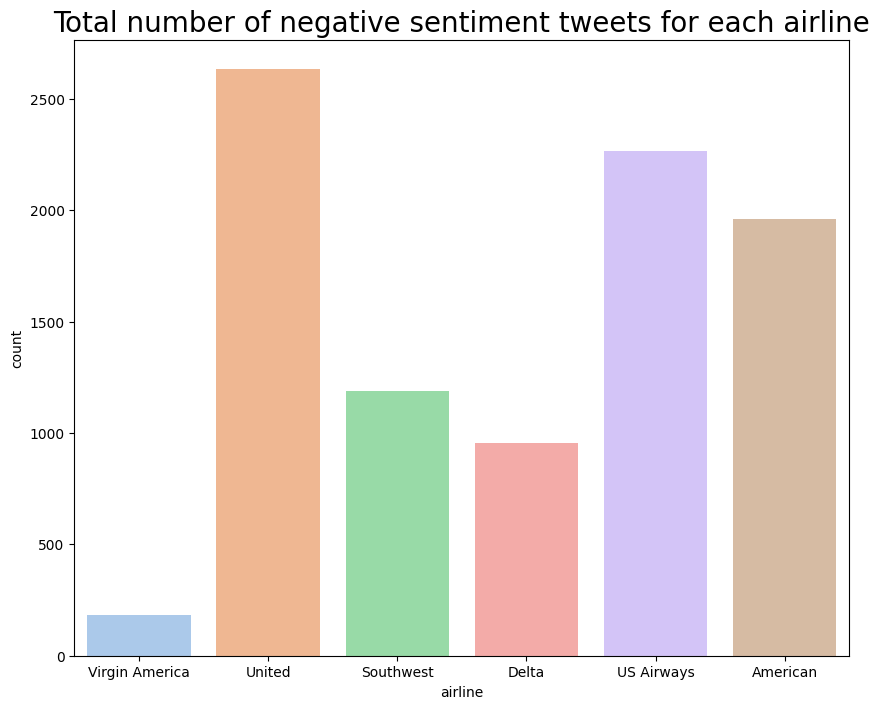

Total number of negative sentiment tweets for each airline:
US Airways: 
 airline_sentiment
negative    2263
Name: count, dtype: int64
United: 
 airline_sentiment
negative    2633
Name: count, dtype: int64
American: 
 airline_sentiment
negative    1960
Name: count, dtype: int64
Southwest: 
 airline_sentiment
negative    1186
Name: count, dtype: int64
Delta: 
 airline_sentiment
negative    955
Name: count, dtype: int64
Virgin America: 
 airline_sentiment
negative    181
Name: count, dtype: int64
Percentage of negative sentiment tweets compared to all sentiments for each airline:
airline
United            68.890633
US Airways        77.686234
American          71.040232
Southwest         49.008264
Delta             42.979298
Virgin America    35.912698
Name: count, dtype: float64


In [10]:
negative_df = df[df['airline_sentiment'] == 'negative']

cprint("Total number of negative sentiment tweets for each airline:", 'green')
print(negative_df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize=(10, 8))
ax = sns.countplot(x='airline', data=negative_df, palette='pastel')
ax.set_title(label='Total number of negative sentiment tweets for each airline', fontsize=20)
plt.show()

cprint("Total number of negative sentiment tweets for each airline:", 'green')
airlines = ['US Airways', 'United', 'American', 'Southwest', 'Delta', 'Virgin America']
for i in airlines:
    print('{}: \n'.format(i), negative_df.loc[negative_df.airline == i].airline_sentiment.value_counts())
    

total_tweets_per_airline = df['airline'].value_counts()
negative_tweets_per_airline = negative_df['airline'].value_counts()
percentage_negative_tweets = (negative_tweets_per_airline / total_tweets_per_airline) * 100


cprint("Percentage of negative sentiment tweets compared to all sentiments for each airline:", 'green')
print(percentage_negative_tweets)

# **Reasons Of Negative Tweets**

Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


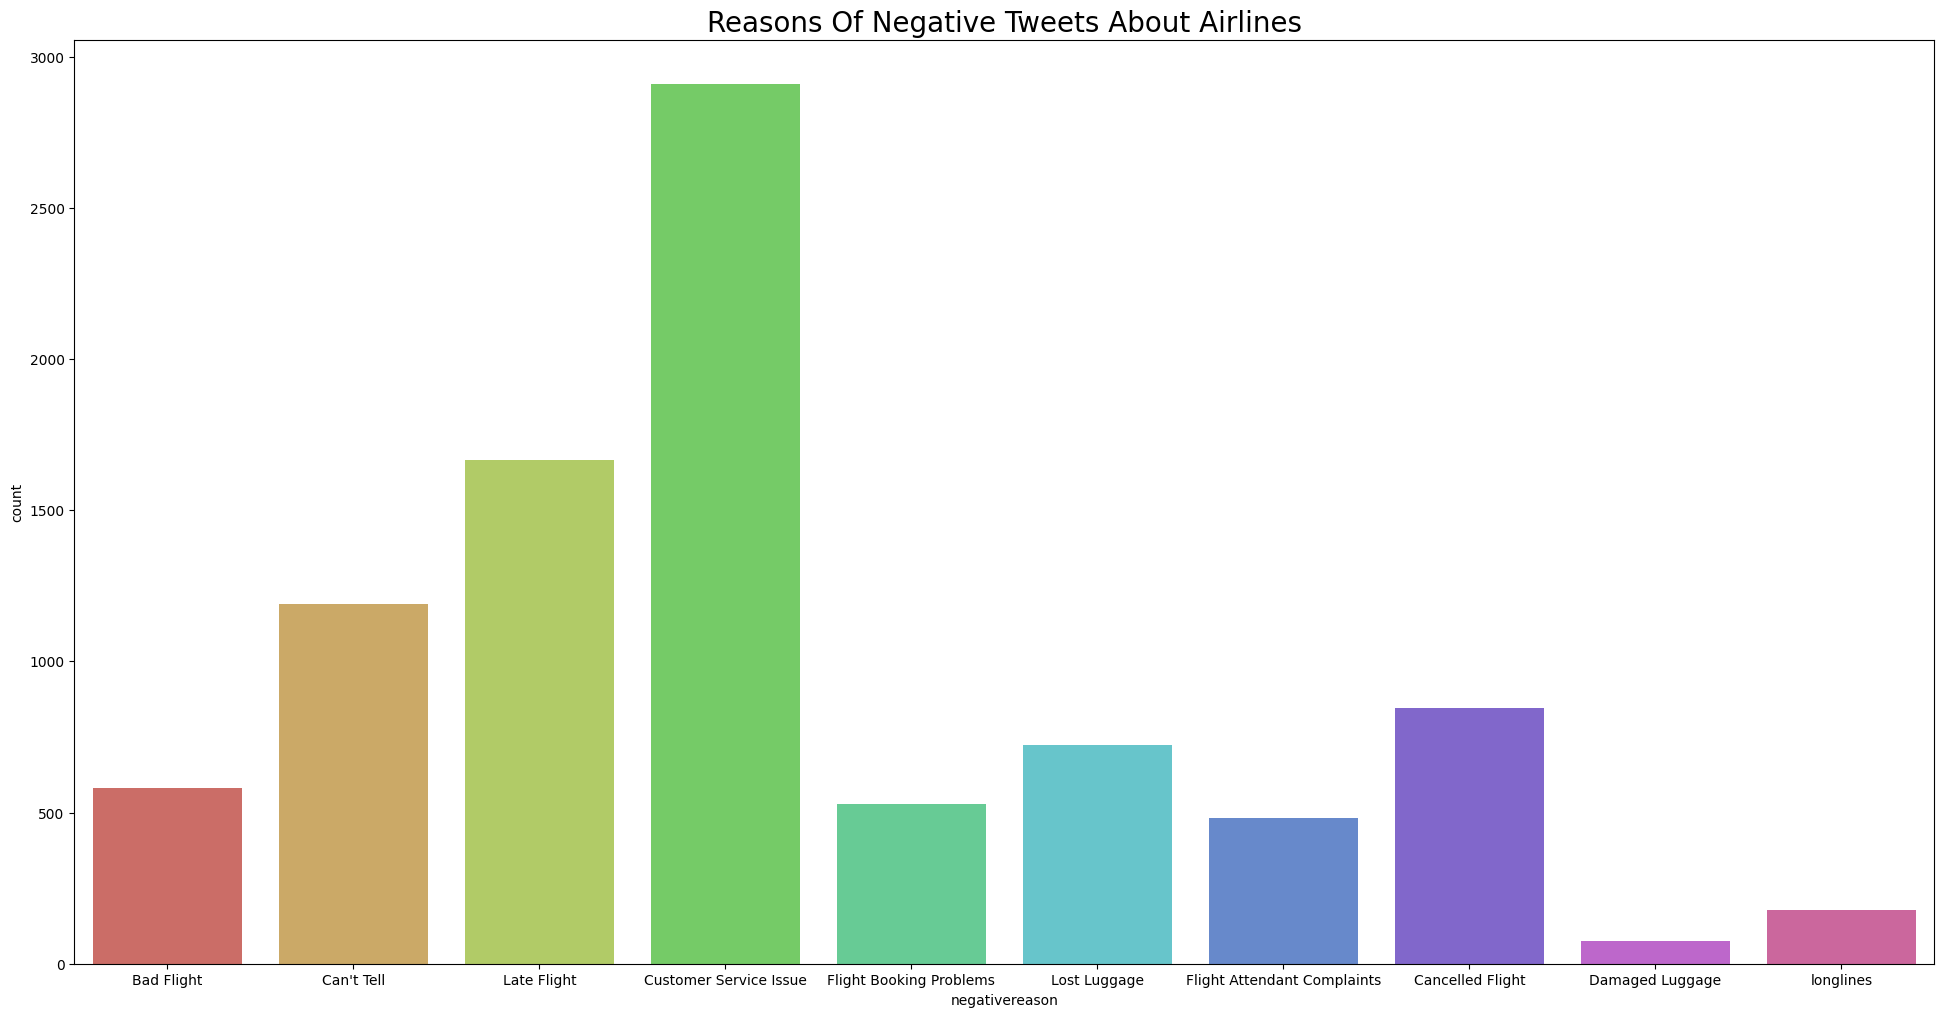

In [11]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

# **Reasons Of Negative Tweets on Every AirLine Company**

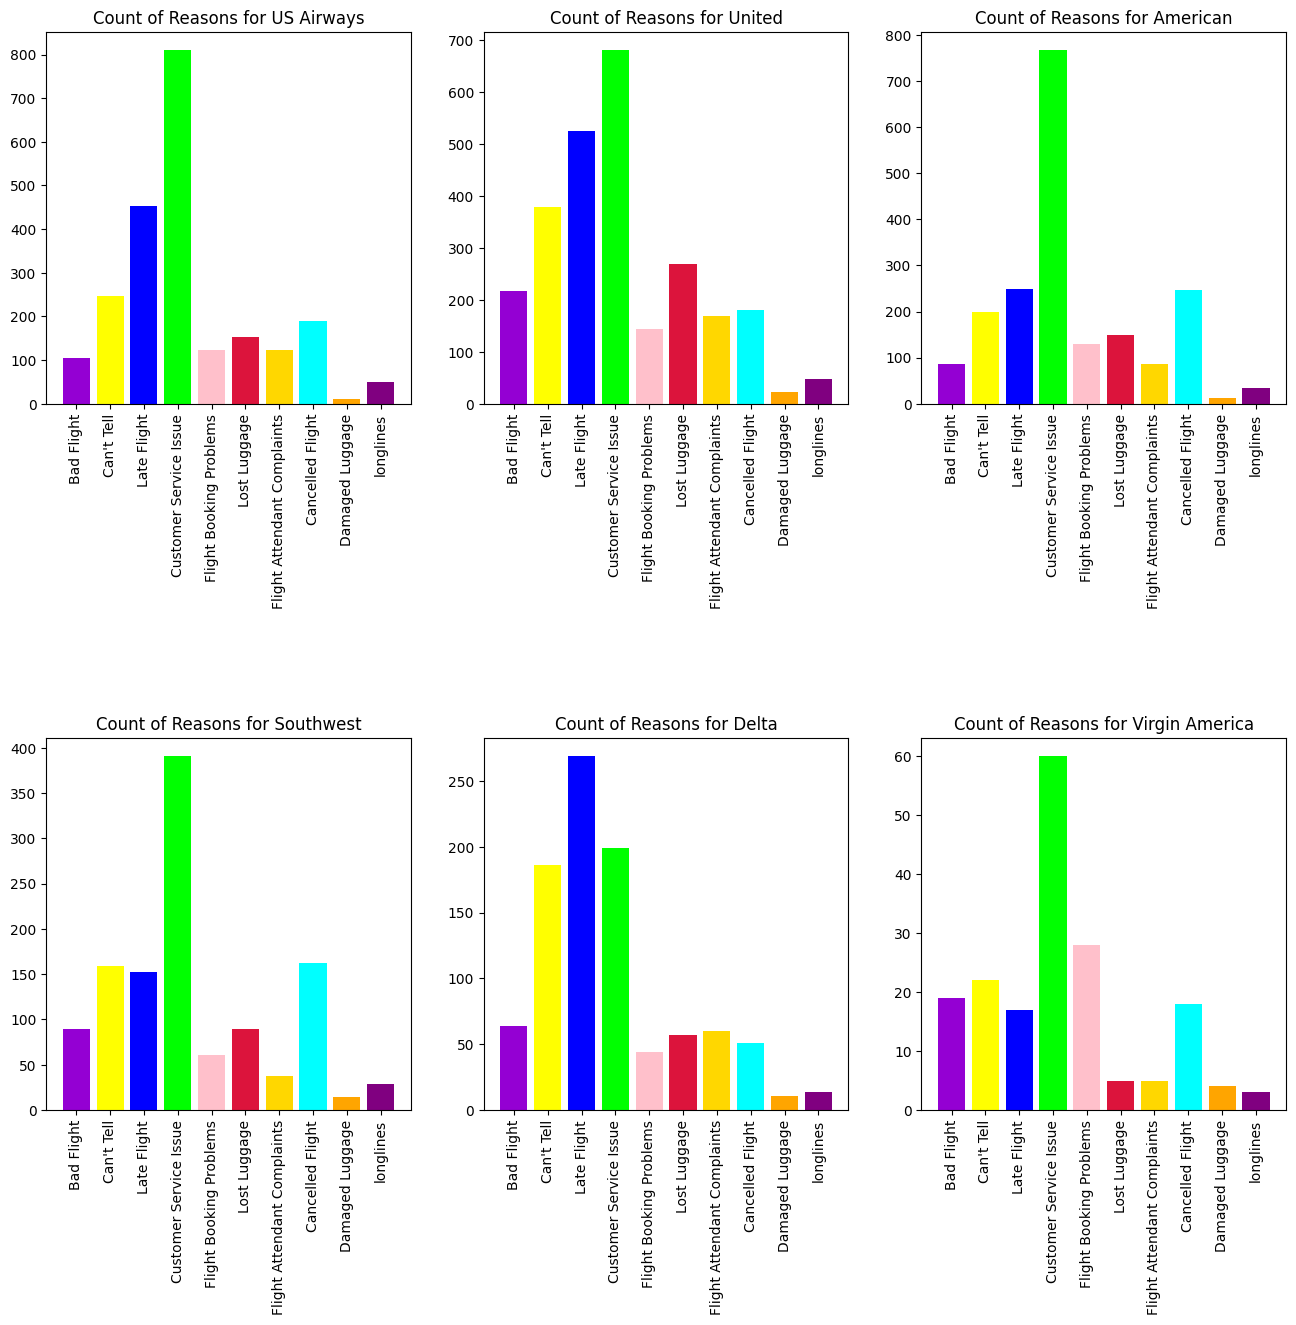

In [12]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def Plot_Reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(16, 14))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    Plot_Reason(i)